<a href="https://colab.research.google.com/github/Gaks978/DML-Checkpoint/blob/main/Data_Visualization_with_Python_Checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

What You're Aiming For

The objective of this checkpoint is to analyze the 'Climate change in Africa' dataset by visualizing temperature fluctuations across five African countries from 1980 to 2023, focusing on specific tasks like plotting temperature trends, comparing histograms of temperature distributions, and determining the most effective chart for representing average temperatures per country.


Instructions

In this checkpoint, we are going to work on the 'Climate change in Africa' dataset that was provided by the U.S global change research program.

Dataset description : This dataset contains historical data about the daily min, max and average temperature fluctuation in 5 African countries (Egypt, Tunisia, Cameroon, Senegal, Angola) between 1980 and 2023.

➡️ Dataset link

https://i.imgur.com/w2czdso.jpg

1) Load the dataset into a data frame using Python.

2) Clean the data as needed.

3) Plot a line chart to show the average temperature fluctuations in Tunisia and Cameroon. Interpret the results.

4) Zoom in to only include data between 1980 and 2005, try to customize the axes labels.

5) Create Histograms to show temperature distribution in Senegal between [1980,2000] and [2000,2023] (in the same figure). Describe the obtained results.

6) Select the best chart to show the Average temperature per country.

7) Make your own questions about the dataset and try to answer them using the appropriate visuals.


Note: Feel free to choose the visualization library (e.g., Matplotlib, Seaborn, Plotly) that best suits your style and the requirements of the tasks listed below.

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [17]:
# Loading the dataset
df = pd.read_csv('/content/Africa_climate_change.csv')
df.head()

,DATE,PRCP,TAVG,TMAX,TMIN,COUNTRY
0,19800101 000000,NaN,54.0,61.0,43.0,Tunisia
1,19800101 000000,NaN,49.0,55.0,41.0,Tunisia
2,19800101 000000,0.0,72.0,86.0,59.0,Cameroon
3,19800101 000000,NaN,50.0,55.0,43.0,Tunisia
4,19800101 000000,NaN,75.0,91.0,NaN,Cameroon


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464815 entries, 0 to 464814
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   DATE     464815 non-null  object 
 1   PRCP     177575 non-null  float64
 2   TAVG     458439 non-null  float64
 3   TMAX     363901 non-null  float64
 4   TMIN     332757 non-null  float64
 5   COUNTRY  464815 non-null  object 
dtypes: float64(4), object(2)
memory usage: 21.3+ MB


In [19]:
df.describe(include='all')

,DATE,PRCP,TAVG,TMAX,TMIN,COUNTRY
count,464815,177575.000000,458439.000000,363901.000000,332757.000000,464815
unique,15938,NaN,NaN,NaN,NaN,5
top,20150625 000000,NaN,NaN,NaN,NaN,Senegal
freq,37,NaN,NaN,NaN,NaN,183262
mean,NaN,0.120941,77.029838,88.713969,65.548262,NaN
std,NaN,0.486208,11.523634,13.042631,11.536547,NaN
min,NaN,0.000000,-49.000000,41.000000,12.000000,NaN
25%,NaN,0.000000,70.000000,81.000000,58.000000,NaN
50%,NaN,0.000000,80.000000,90.000000,68.000000,NaN
75%,NaN,0.010000,85.000000,99.000000,74.000000,NaN


# Cleaning the data

In [20]:
# Removing the unnecessary column(PRCP)
df.drop('PRCP', axis=1, inplace=True)

In [21]:
df.head()

,DATE,TAVG,TMAX,TMIN,COUNTRY
0,19800101 000000,54.0,61.0,43.0,Tunisia
1,19800101 000000,49.0,55.0,41.0,Tunisia
2,19800101 000000,72.0,86.0,59.0,Cameroon
3,19800101 000000,50.0,55.0,43.0,Tunisia
4,19800101 000000,75.0,91.0,NaN,Cameroon


In [23]:
# Convert Date to datetime format
df['DATE'] = pd.to_datetime(df['DATE'])

In [24]:
df.head()

,DATE,TAVG,TMAX,TMIN,COUNTRY
0,1980-01-01,54.0,61.0,43.0,Tunisia
1,1980-01-01,49.0,55.0,41.0,Tunisia
2,1980-01-01,72.0,86.0,59.0,Cameroon
3,1980-01-01,50.0,55.0,43.0,Tunisia
4,1980-01-01,75.0,91.0,NaN,Cameroon


In [25]:
# Missing values
df.isnull().sum()

,0
DATE,0
TAVG,6376
TMAX,100914
TMIN,132058
COUNTRY,0


In [31]:
# Dropping rows where TAVG is missing so as to have uniform data
df.dropna(subset=['TAVG'], inplace=True)

In [32]:
# Check for remaining missing values
df.isnull().sum()

,0
DATE,0
TAVG,0
TMAX,98693
TMIN,129837
COUNTRY,0


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 458439 entries, 0 to 464814
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   DATE     458439 non-null  datetime64[ns]
 1   TAVG     458439 non-null  float64       
 2   TMAX     359746 non-null  float64       
 3   TMIN     328602 non-null  float64       
 4   COUNTRY  458439 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 21.0+ MB


<ipython-input-36-97ac95b3606b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['YEAR'] = subset['DATE'].dt.year


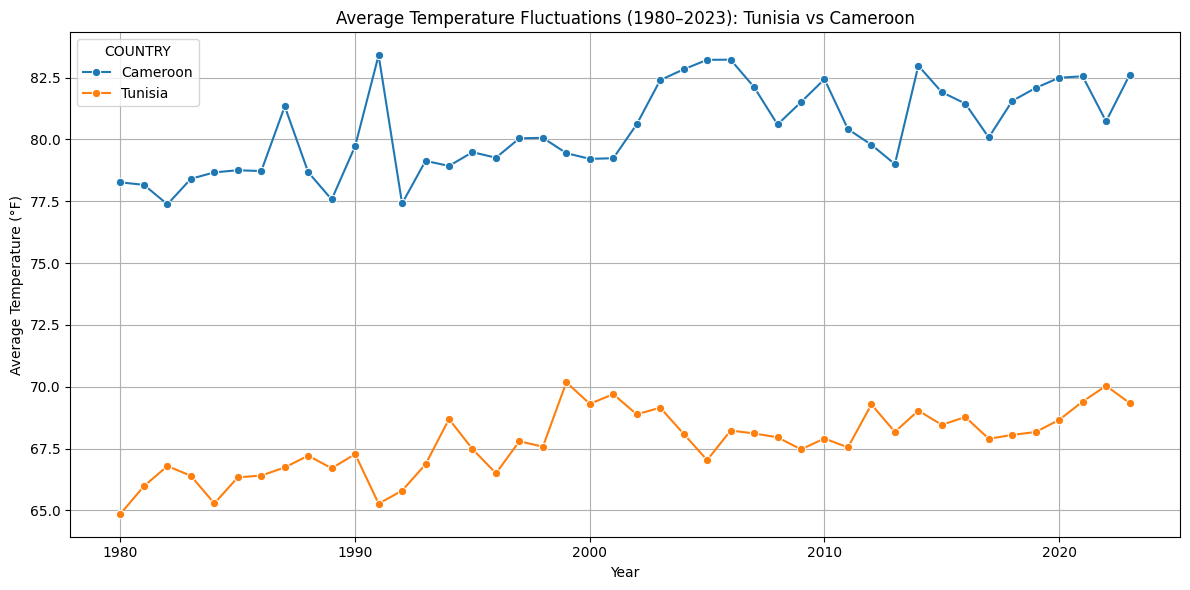

In [36]:
# Plotting a line chart to show the average temperature fluctuations in Tunisia and Cameroon
# Filter data for Tunisia and Cameroon
subset = df[df['COUNTRY'].isin(['Tunisia', 'Cameroon'])]

# Group by year and country, then compute the average temperature
subset['YEAR'] = subset['DATE'].dt.year
yearly_avg = subset.groupby(['YEAR', 'COUNTRY'])['TAVG'].mean().reset_index()

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_avg, x='YEAR', y='TAVG', hue='COUNTRY', marker='o')
plt.title('Average Temperature Fluctuations (1980–2023): Tunisia vs Cameroon')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°F)')
plt.grid(True)
plt.tight_layout()
plt.show()

Interpretation


*   Cameroon generally has higher average temperatures over the course of all those years



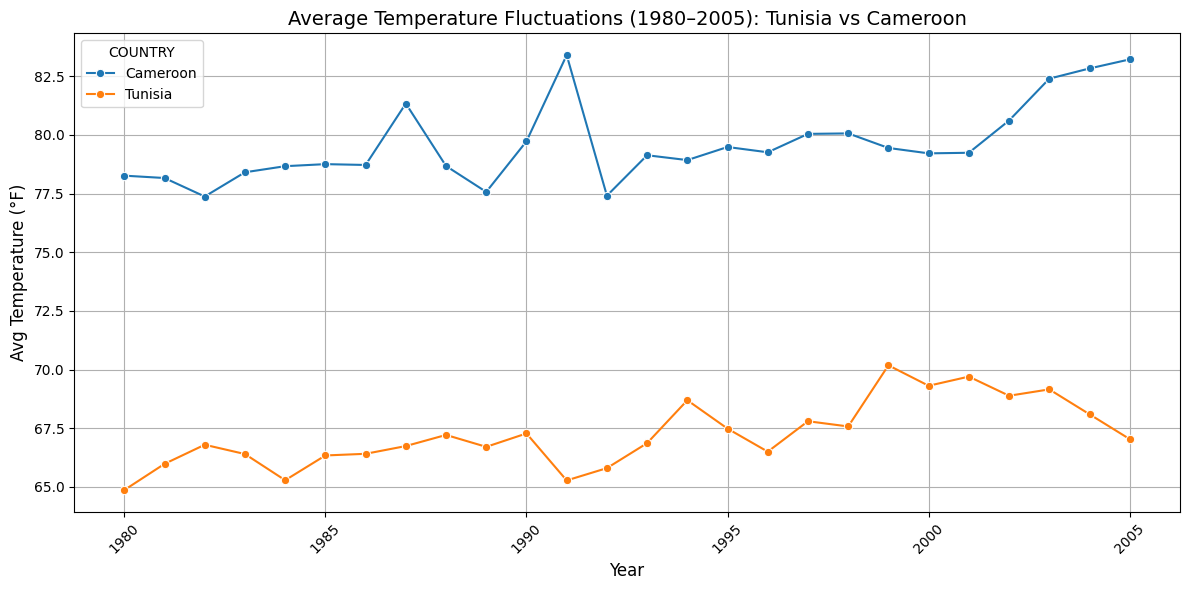

In [40]:
# Zooming in to only include data between 1980 and 2005, trying to customize the axes labels

# Filter for Tunisia and Cameroon
subset = df[df['COUNTRY'].isin(['Tunisia', 'Cameroon'])].copy()

# Add YEAR column
subset['YEAR'] = subset['DATE'].dt.year

# Filter for 1980 to 2005
subset_zoom = subset[(subset['YEAR'] >= 1980) & (subset['YEAR'] <= 2005)]

# Group by year and country, compute mean TAVG
yearly_avg_zoom = subset_zoom.groupby(['YEAR', 'COUNTRY'])['TAVG'].mean().reset_index()

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_avg_zoom, x='YEAR', y='TAVG', hue='COUNTRY', marker='o')
plt.title('Average Temperature Fluctuations (1980–2005): Tunisia vs Cameroon', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Avg Temperature (°F)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


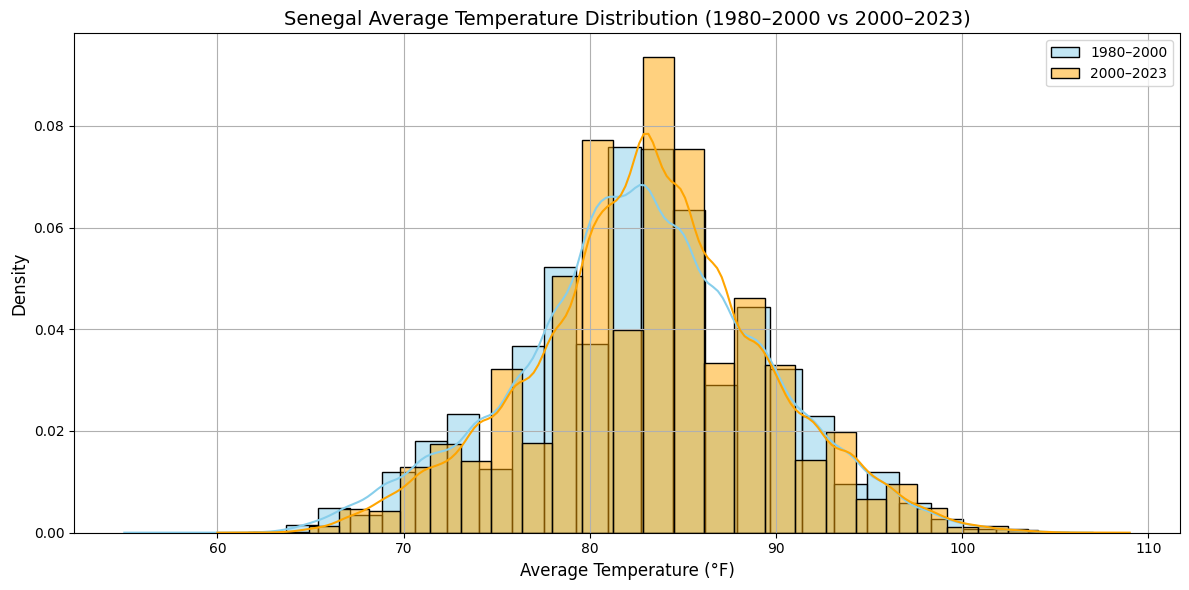

In [42]:
# Creating Histogram to show temperature distribution in Senegal between [1980,2000] and [2000,2023]
# Filter Senegal data
senegal_data = df[df['COUNTRY'] == 'Senegal'].copy()
senegal_data['YEAR'] = senegal_data['DATE'].dt.year

# Split into two time ranges
senegal_80_00 = senegal_data[(senegal_data['YEAR'] >= 1980) & (senegal_data['YEAR'] <= 2000)]
senegal_00_23 = senegal_data[(senegal_data['YEAR'] > 2000) & (senegal_data['YEAR'] <= 2023)]

# Plotting histograms
plt.figure(figsize=(12, 6))
sns.histplot(senegal_80_00['TAVG'], bins=30, color='skyblue', label='1980–2000', kde=True, stat='density')
sns.histplot(senegal_00_23['TAVG'], bins=30, color='orange', label='2000–2023', kde=True, stat='density')

plt.title('Senegal Average Temperature Distribution (1980–2000 vs 2000–2023)', fontsize=14)
plt.xlabel('Average Temperature (°F)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Interpretation


*   Shift in distribution between the two periods indicate warming trends



<ipython-input-43-2180733136e5>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=country_avg, x='TAVG', y='COUNTRY', palette='coolwarm')


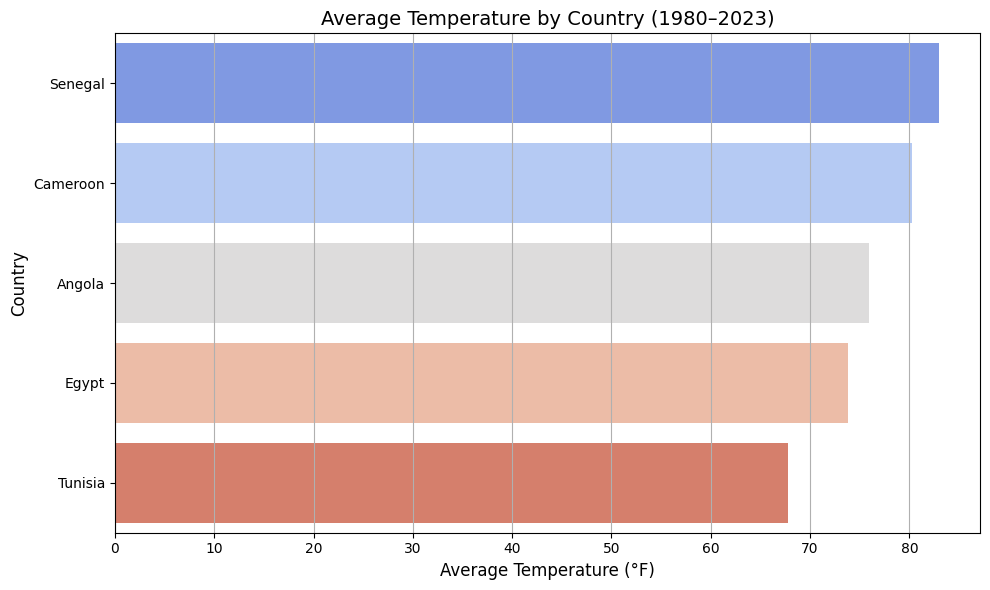

In [43]:
# Best chart to show the Average temperature per country.

# Group by country and compute mean of TAVG
country_avg = df.groupby('COUNTRY')['TAVG'].mean().reset_index()

# Sort for better visuals
country_avg = country_avg.sort_values(by='TAVG', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=country_avg, x='TAVG', y='COUNTRY', palette='coolwarm')
plt.title('Average Temperature by Country (1980–2023)', fontsize=14)
plt.xlabel('Average Temperature (°F)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.grid(axis='x')
plt.tight_layout()
plt.show()


# Custom questions
1) How does temperature variability compare across countries?

<ipython-input-44-410fbe1bb6ff>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=temp_std, x='StdDev', y='COUNTRY', palette='viridis')


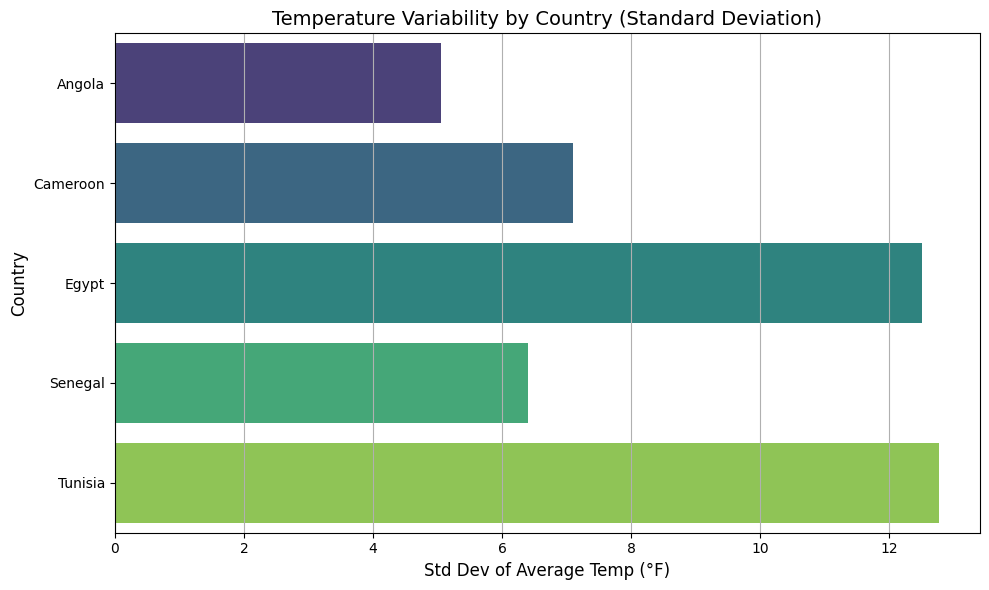

In [44]:
# Compute temperature standard deviation by country
temp_std = df.groupby('COUNTRY')['TAVG'].std().reset_index(name='StdDev')

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=temp_std, x='StdDev', y='COUNTRY', palette='viridis')
plt.title('Temperature Variability by Country (Standard Deviation)', fontsize=14)
plt.xlabel('Std Dev of Average Temp (°F)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.grid(axis='x')
plt.tight_layout()
plt.show()


2) Which country has the highest temperature increase over time?

<ipython-input-45-01b8996e09e1>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=temp_change, x='change', y='COUNTRY', palette='RdYlGn_r')


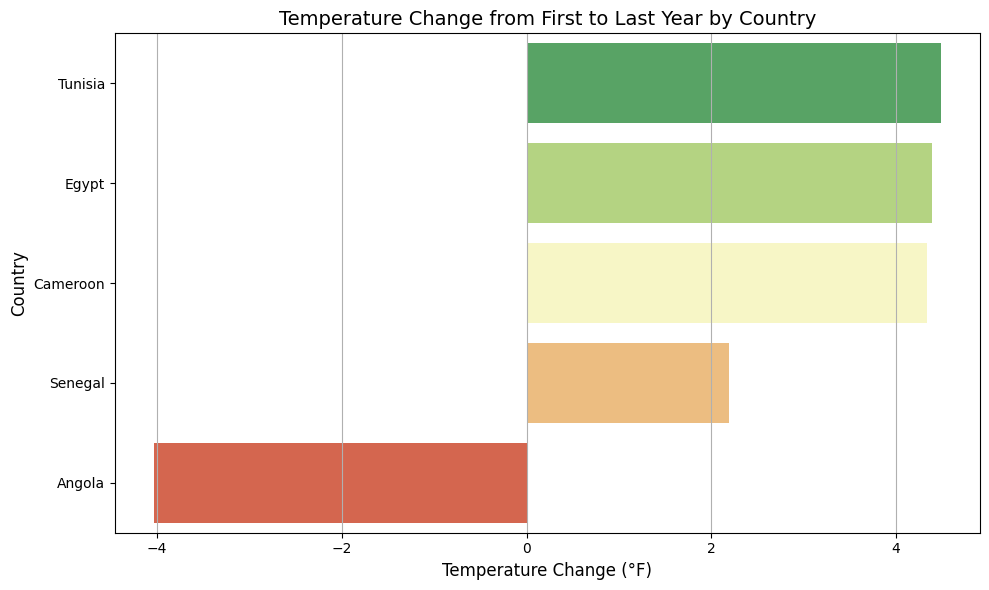

In [45]:
# Add year column
df['YEAR'] = df['DATE'].dt.year

# Group by country and year
annual_avg = df.groupby(['COUNTRY', 'YEAR'])['TAVG'].mean().reset_index()

# Get first and last year for each country
temp_change = annual_avg.groupby('COUNTRY').agg(start_temp=('TAVG', lambda x: x.iloc[0]),
                                                 end_temp=('TAVG', lambda x: x.iloc[-1]))
temp_change['change'] = temp_change['end_temp'] - temp_change['start_temp']
temp_change = temp_change.sort_values(by='change', ascending=False).reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=temp_change, x='change', y='COUNTRY', palette='RdYlGn_r')
plt.title('Temperature Change from First to Last Year by Country', fontsize=14)
plt.xlabel('Temperature Change (°F)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.grid(axis='x')
plt.tight_layout()
plt.show()


3) What are seasonal patterns like in Senegal over the years?

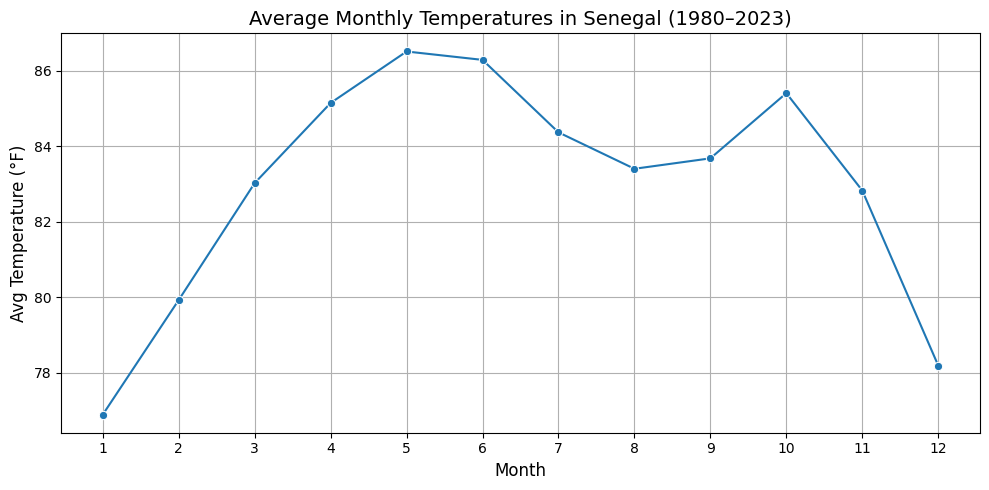

In [48]:
# Filter for Senegal and extract month
egypt = df[df['COUNTRY'] == 'Senegal'].copy()
egypt['MONTH'] = egypt['DATE'].dt.month

# Group by month
monthly_avg = egypt.groupby('MONTH')['TAVG'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_avg, x='MONTH', y='TAVG', marker='o')
plt.title('Average Monthly Temperatures in Senegal (1980–2023)', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Avg Temperature (°F)', fontsize=12)
plt.xticks(range(1, 13))
plt.grid(True)
plt.tight_layout()
plt.show()
